In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

/compuworks/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/compuworks/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/compuworks/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/compuworks/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [2]:
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

Instructions for updating:
Colocations handled automatically by placer.


/compuworks/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 100, 100, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer=optimizers.Adam(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=30, batch_size=20, validation_data=(x_test, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
50000/50000 [==============================] - 513s 10ms/sample - loss: 0.2493 - acc: 0.9123 - val_loss: 0.1228 - val_acc: 0.9554
Epoch 2/30
50000/50000 [==============================] - 495s 10ms/sample - loss: 0.1699 - acc: 0.9383 - val_loss: 0.0799 - val_acc: 0.9728
Epoch 3/30
50000/50000 [==============================] - 493s 10ms/sample - loss: 0.1338 - acc: 0.9528 - val_loss: 0.0612 - val_acc: 0.9794
Epoch 4/30
50000/50000 [==============================] - 495s 10ms/sample - loss: 0.1099 - acc: 0.9630 - val_loss: 0.0542 - val_acc: 0.9824
Epoch 5/30
50000/50000 [==============================] - 493s 10ms/sample - loss: 0.0937 - acc: 0.9691 - val_loss: 0.0453 - val_acc: 0.9850
Epoch 6/30
50000/50000 [==============================] - 499s 10ms/sample - loss:

In [10]:
model.save('my_model_resnet1.h5')
model = tf.keras.models.load_model('my_model_resnet1.h5')

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 26s 3ms/sample - loss: 0.0371 - acc: 0.9882


[0.03712739855051041, 0.98822004]

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_3 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 multiple                  0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
batch_normalization_v1_3 (Ba multiple                  524288    
_________________________________________________________________
dense_3 (Dense)              multiple                  16777344  
__________

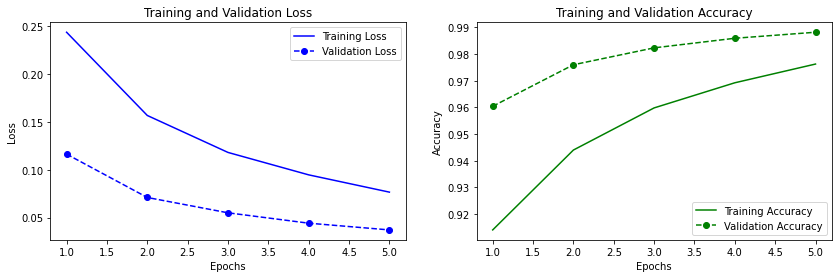

In [22]:
# Visualization loss and accuracy plots
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, marker='o', linestyle='dashed', label='Validation Loss', color='blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc,  label='Training Accuracy', c='green')
plt.plot(epochs, val_acc, marker='o', linestyle='dashed', label='Validation Accuracy', c='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()